## <font color='cyan'>*** Esther Gutiérrez --- MODULO 3 EJERCICIO A2 ***</font>
### Clasificación Autismo: Intentar determinar si una persona tiene autismo o no
De la página Kaggle, he elegido el dataset con datos de autismo disponible en https://www.kaggle.com/datasets/konikarani/autismdiagnosis

Además de <font color='red'>k-means</font>, utilizaré los algortimos de <font color='red'>Regresión Logística</font> y <font color='red'>Random Forest</font>

<font color=#FFFF00> 1. CARGA DEL DATASET. </font>

En este caso nos proporcionan 3 ficheros
- train.csv: datos para el entrenamiento
- test.csv: datos para hacer pruebas. En este caso, el atributo objetivo (Class/ASD) no está informado.
- sample_submission.csv: resultado de someter el conjunto de test. Todos los resultados dan 1 (autismo), no parece correcto

Utilizaré entonces el archivo train.csv, subdividiéndolo en train y test para probar y medir los diferentes algoritmos. El archivo test.csv sólo lo usaré para hacer predicciones y ver qué resultado obtengo.

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing


In [72]:
dfInicial = pd.read_csv('train.csv')
pd.options.display.max_columns = None
dfInicial

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,0,1,0,0,0,0,0,0,1,1,16.597187,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,1,20.703001,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,0,5.711481,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,0,16.414305,f,?,no,no,Canada,no,9.069342,18 and more,Self,0


<font color=#FFFF00> 2. DESCRIPCION DE LOS DATOS Y ANÁLISIS EXPLORATORIO. </font>

In [73]:
dfInicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [74]:
dfInicial.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.0000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,28.452118,8.537303,0.201250
std,231.0844,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.310966,4.807676,0.401185
min,1.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.718550,-6.137748,0.000000
25%,200.7500,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.198153,5.306575,0.000000
50%,400.5000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.848350,9.605299,0.000000
75%,600.2500,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.865429,12.514484,0.000000
max,800.0000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.461718,15.853126,1.000000


Tenemos 800 filas y 22 atributos. Inicialmente parece como si todos los atributos estuvieran informados porque el dfInicial.info() nos marca 800 non-null para todos los atributos. 

Voy a revisar cómo se distribuyen los valores en cada atributo

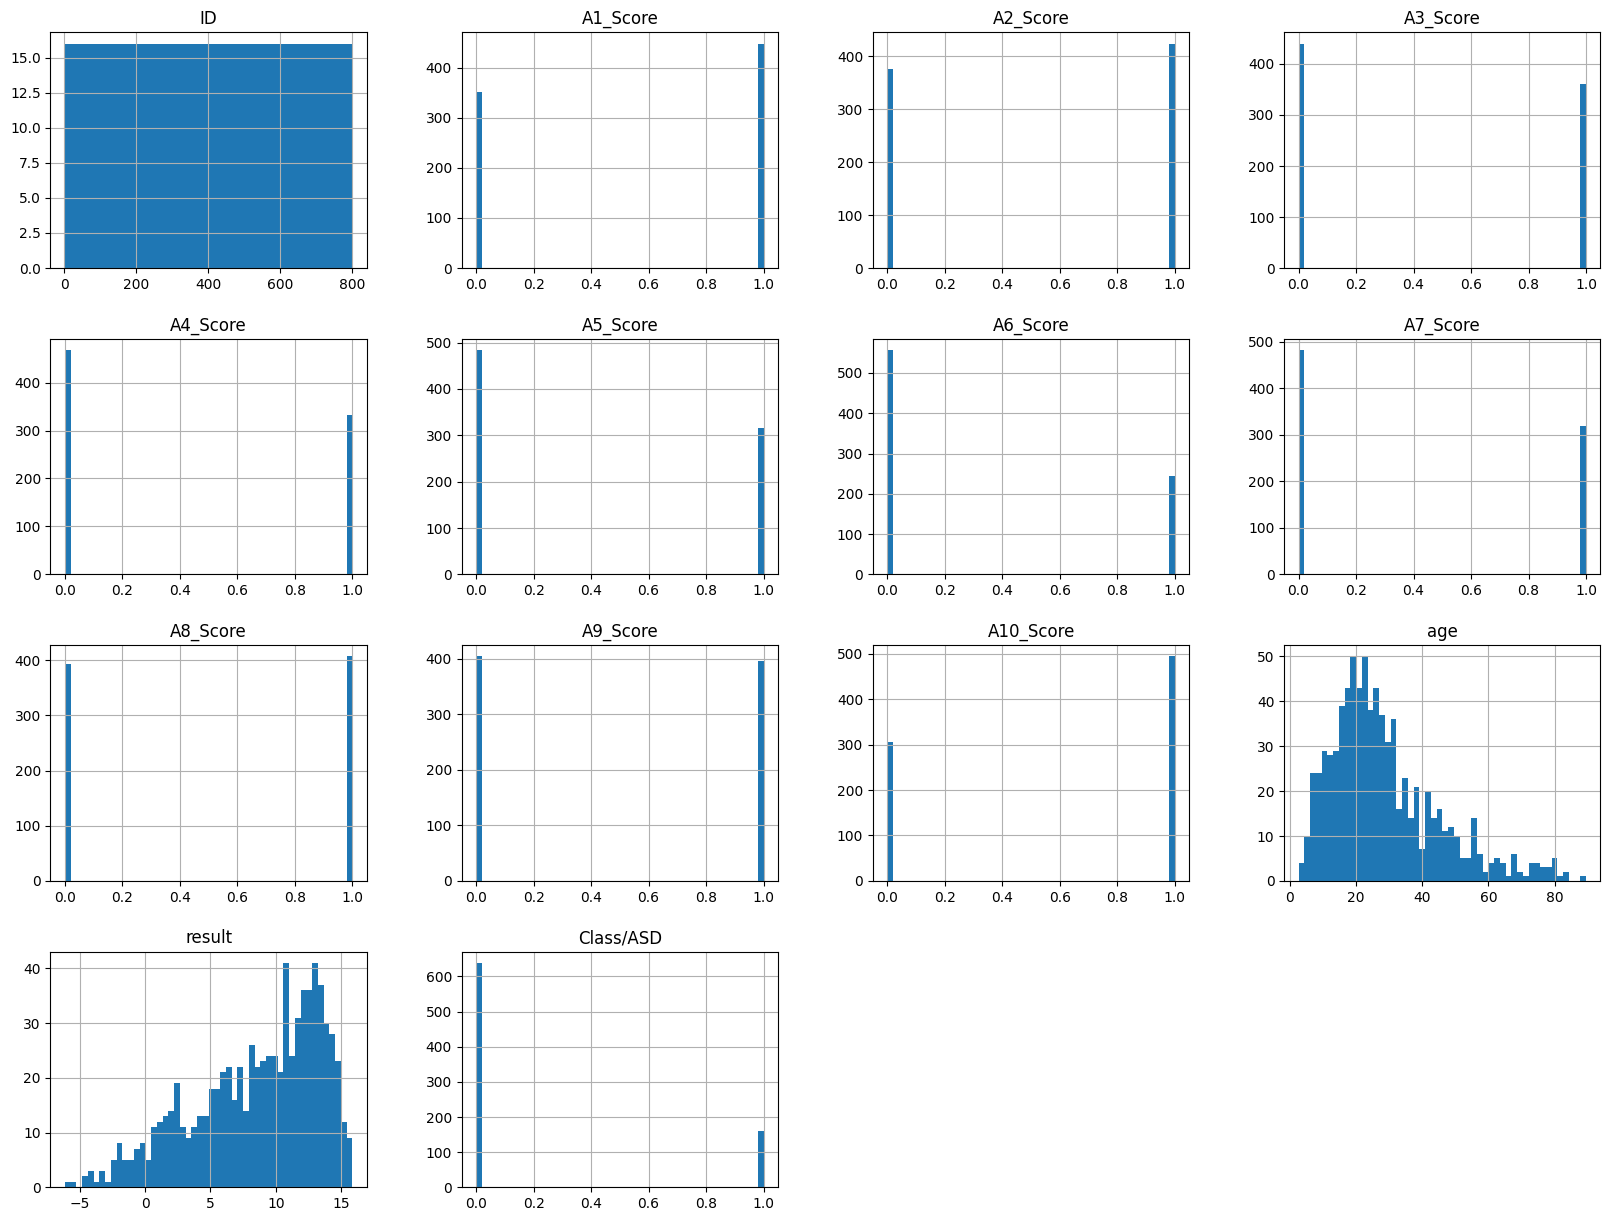

In [75]:
dfInicial.hist(bins=50, figsize=(20,15))
plt.show()

- El atributo ID identifica con un número único a cada persona, no aporta información para lo que queremos predecir
- Los atributos que van de A1_Score a A10_Score vemos que son atributos de tipo integer y que sólo cogen valores 0 o 1. La documentación del dataset indica que son los resultados de la herramienta "Autism Spectrum Quotient (AQ) 10 item screening tool"
- En el atributo age, de tipo número con decimales, tenemos la edad de las personas expresada en años. Vemos que las muestras se mueven entre los pocos años de edad y hasta los 90 años de edad, aunque tenemos más muestras entre los 18 y 35 años aproximadamente.
- En el atributo result, de tipo número con decimales, según la documentación, se recoge la puntuación global para "AQ1-10 screening test". Veo que puede tomar valores negativos y además he revisado varios registros que, pese a tener los mismos valores en las columnas de A1_Score a A10_Score, este campo tiene un valor diferente. Es decir, este score no es simplemente la suma de los resultados del test de preguntas sinó que de alguna manera está ponderando los resultados a las preguntas o bien está incluyendo en la fórmula valores de otras columnas como podría ser la edad, el género, si tiene algún familiar con autismo, etc. o incluso de información que no proporciona el dataset.
- En el atributo objetivo, el Class/ASD, sólo hay dos valores posibles, 0 para indicar que no tiene autismo y 1 para indicar que sí tiene autismo.

A continuación voy a revisar los valores que están registrando los otros campos de tipo object:

In [76]:
print(dfInicial.gender.value_counts())

m    530
f    270
Name: gender, dtype: int64


La columna gender sólo toma 2 valores posibles y hace referencia al sexo de la persona. Hay más muestras del sexo masculiono que de femenino

In [77]:
print(dfInicial.ethnicity.value_counts())

White-European     257
?                  203
Middle Eastern      97
Asian               67
Black               47
South Asian         34
Pasifika            32
Others              29
Latino              17
Hispanic             9
Turkish              5
others               3
Name: ethnicity, dtype: int64


El atributo ethnicity vemos que tiene 203 valores a ?. Este interrogante indica que no está informado... son valores nulos sobre los que habrá que tomar una decisión. También vemos que está diferenciando entre others y Others debido a que la primera letra está en minúscula o mayúscula, cuando todo debería ser del mismo grupo.

In [78]:
print(dfInicial.jaundice.value_counts())

no     615
yes    185
Name: jaundice, dtype: int64


Vemos que sólo hay 2 valores posibles, yes o no. He leído en google que hay algunos estudios que relacionan el hecho de que los bebés tengan ictericia los primeros días de vida con que posteriormente acaben desarrollando autismo. Otros estudios indican que es una relación muy débil.

In [79]:
print(dfInicial.austim.value_counts())

no     669
yes    131
Name: austim, dtype: int64


Según la documentaicón, esta columna indica si la persona tiene algún familiar con autismo. Recoge 2 posibles valores, yes o no. En el autismo, parece ser que sí intervienen factores genéticos.

In [80]:
print(dfInicial.contry_of_res.value_counts())

United States           134
India                   108
New Zealand              78
United Kingdom           67
Jordan                   55
United Arab Emirates     40
Australia                37
Canada                   30
Afghanistan              22
Netherlands              20
Austria                  18
Sri Lanka                17
Brazil                   12
Spain                    10
France                   10
Kazakhstan               10
Ireland                   9
Iran                      8
Russia                    7
South Africa              6
Italy                     6
Bahamas                   6
Malaysia                  6
Viet Nam                  5
Pakistan                  4
China                     4
Mexico                    4
Nicaragua                 4
Armenia                   4
Azerbaijan                4
Iraq                      4
Aruba                     4
Saudi Arabia              4
AmericanSamoa             4
Bolivia                   3
Serbia              

Esta columna recoge el país de residencia. Hay 56 valores diferentes.

In [81]:
print(dfInicial.used_app_before.value_counts())

no     750
yes     50
Name: used_app_before, dtype: int64


Indica si la persona ya había realizado el test previamente

In [82]:
print(dfInicial.age_desc.value_counts())

18 and more    800
Name: age_desc, dtype: int64


Esta columna debería indicar el grupo de edad en que se encuentra la persona, pero parece que todos los registros tienen el mismo valor (pese a que la columna age indica que hay personas menores de 18 años), así que no parece que esté bien informada

In [83]:
print(dfInicial.relation.value_counts())

Self                        709
?                            40
Parent                       29
Relative                     18
Others                        2
Health care professional      2
Name: relation, dtype: int64


Según entiendo al leer la documentación, indica quién realizó el test al paciente. A priori, no me parece información relevante. El test de cribado es un test de 10 preguntas sencillas, considero que no son tan complejas como para que las deba realizar un profesional de la salud (p.ej.) para que tengan validez.

<font color=#FFFF00> 3. PREPROCESADO DE DATOS. TRATAMIENTO DE NULOS. SELECCIÓN Y DESCARTE DE FEATURES. NUEVAS FEATURES. PIPELINE </font>

Según lo comentado anteriormente, voy a realizar las siguientes modificaciones en el dataset:
- Eliminaré las columnas ID, age_desc y relation, porque no me parece que aporten información para lo que queremos predecir
- Las columnas gender, jandice, autism y used_app_before (que actualmente son object) las pasaré a columnas integer con valores 0 o 1
- En la columna ethnicity, pasaré los valores 'others' a 'Others'. También voy a imputar a este valor 'Others' los nulos (valor ?)
- Crearé una nueva columna PuntuacionTest que corresponderá a la suma de los atributos A1_Score hasta A10_Score.
- Transformaré las columnas ethnicity y contry_of_res (que actualmente son object) a columnas de tipo integer, con ayuda de un LabelEncoder que directamente asignará números a los diferentes valores

In [84]:
dfTratado = dfInicial.drop(["ID", "age_desc", "relation"], axis=1, inplace=False)
dfTratado['gender'] = dfTratado['gender'].map({'m': 0, 'f': 1})
dfTratado['jaundice'] = dfTratado['jaundice'].map({'no': 0, 'yes': 1})
dfTratado['austim'] = dfTratado['austim'].map({'no': 0, 'yes': 1})
dfTratado['used_app_before'] = dfTratado['used_app_before'].map({'no': 0, 'yes': 1})
dfTratado['ethnicity'] = dfTratado['ethnicity'].replace({'others': 'Others', '?': 'Others'})
dfTratado['PuntuacionTest'] = dfTratado['A1_Score'] + dfTratado['A2_Score'] + dfTratado['A3_Score'] + dfTratado['A4_Score'] + dfTratado['A5_Score'] + dfTratado['A6_Score'] + dfTratado['A7_Score'] + dfTratado['A8_Score'] + dfTratado['A9_Score'] + dfTratado['A10_Score'] 
label_encoder = preprocessing.LabelEncoder()
dfTratado['ethnicity']= label_encoder.fit_transform(dfTratado['ethnicity']) 
dfTratado['contry_of_res']= label_encoder.fit_transform(dfTratado['contry_of_res']) 
dfTratado

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,Class/ASD,PuntuacionTest
0,1,0,1,0,1,0,1,0,1,1,38.172746,1,5,0,0,7,0,6.351166,0,6
1,0,0,0,0,0,0,0,0,0,0,47.750517,0,5,0,0,25,0,2.255185,0,0
2,1,1,1,1,1,1,1,1,1,1,7.380373,0,9,0,1,54,0,14.851484,1,10
3,0,0,0,0,0,0,0,0,0,0,23.561927,1,5,0,0,54,0,2.276617,0,0
4,0,0,0,0,0,0,0,0,0,0,43.205790,0,5,0,0,46,0,-4.777286,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0,1,0,0,0,0,0,0,1,1,16.597187,0,2,0,0,36,0,12.999501,0,3
796,0,1,1,0,0,1,0,1,1,1,20.703001,0,9,0,0,17,0,13.561518,0,6
797,0,0,0,0,0,0,0,0,0,0,5.711481,0,7,1,0,36,0,2.653177,0,0
798,0,0,0,0,0,0,0,0,0,0,16.414305,1,5,0,0,15,0,9.069342,0,0


Para la nueva columna creada (PuntuacionTest), voy a mirar si puede tener alguna relación con nuestra variable objetivo. Al hacer un gráfico de barras veo que, a más PuntuacionTest, más casos de autismo se observan. Lo comparo también con la misma gráfica pero teniendo en cuenta el atributo result y ocurre lo mismo, las proporciones del valor con autismo aumentan a medida que aumenta el result.

<Axes: xlabel='result', ylabel='Count'>

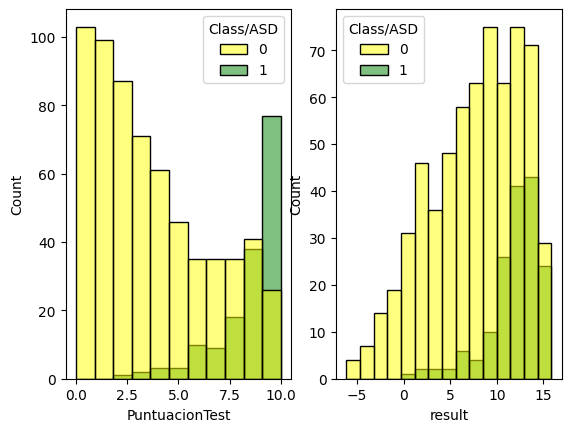

In [85]:
fig, axes = plt.subplots(1, 2)

sns.histplot(x=dfTratado["PuntuacionTest"],color="blue", label="PuntuacionTest", alpha=0.5, hue=dfTratado["Class/ASD"], palette=['yellow', 'green'], ax=axes[0])
sns.histplot(x=dfTratado["result"],color="blue", label="result", alpha=0.5, hue=dfTratado["Class/ASD"], palette=['yellow', 'green'], ax=axes[1])

Para tener guardadas todas las transformaciones, creo un Pipeline que luego podré aplicar a otros conjuntos de datos. Además de las transformaciones que había hecho antes, voy a aprovechar para normalizar las columnas numéricas

In [86]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn import set_config

set_config(transform_output="pandas")

num_cols = ["age", "result", "PuntuacionTest"]

class DFTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
         X.drop(["ID", "age_desc", "relation"], axis=1, inplace=True)
         X['gender'] = X['gender'].map({'m': 0, 'f': 1})
         X['jaundice'] = X['jaundice'].map({'no': 0, 'yes': 1})
         X['austim'] = X['austim'].map({'no': 0, 'yes': 1})
         X['used_app_before'] = X['used_app_before'].map({'no': 0, 'yes': 1})
         X['ethnicity'] = X['ethnicity'].replace({'others': 'Others', '?': 'Others'})
         X['PuntuacionTest'] = X['A1_Score'] + X['A2_Score'] + X['A3_Score'] + X['A4_Score'] + X['A5_Score'] + X['A6_Score'] + X['A7_Score'] + X['A8_Score'] + X['A9_Score'] + X['A10_Score'] 
         label_encoder = preprocessing.LabelEncoder()
         X['ethnicity']= label_encoder.fit_transform(X['ethnicity']) 
         X['contry_of_res']= label_encoder.fit_transform(X['contry_of_res']) 

         scaler = StandardScaler()
         X[num_cols] = scaler.fit_transform(X[num_cols])

         return X


pipeline = Pipeline([

    ('tratarDF', DFTransformer())

])



Para probar el Pipeline, voy a abrir el archivo test.csv y lo voy a pasar por el Pipeline. Me guardaré el dataFrame resultante para utilizarlo al final de la práctica

In [87]:

dfTest = pd.read_csv('test.csv')
dfTest  = pipeline.fit_transform(dfTest)
dfTratado  = pipeline.fit_transform(dfInicial.copy())
dfTest

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,PuntuacionTest
0,1,1,0,0,1,1,0,0,1,1,-0.723383,0,9,1,0,14,0,0.793428,0.291998
1,1,0,0,0,0,0,0,1,0,0,0.076414,0,0,0,0,21,0,-0.451187,-0.836497
2,1,1,1,0,1,1,0,1,1,1,0.384605,0,9,1,0,10,0,-1.168682,0.856246
3,0,0,0,0,0,0,0,0,0,0,-0.048710,0,5,0,0,14,0,-1.372993,-1.400745
4,0,0,0,1,0,0,0,0,0,0,-1.173700,0,5,0,0,17,0,-0.302103,-1.118621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1,1,0,0,1,0,0,1,1,1,-0.205455,0,1,0,0,4,0,-2.253420,0.291998
196,1,0,0,0,0,0,0,0,0,1,-0.838278,0,5,0,0,14,0,-1.734947,-0.836497
197,1,0,0,0,0,0,1,0,1,1,-0.228893,0,5,0,0,23,0,-1.100936,-0.272250
198,0,1,0,0,0,0,0,1,0,1,-0.118916,1,5,0,0,32,0,-0.654892,-0.554374


<font color=#FFFF00>4. CLÚSTERING: K-MEANS. TÉCNICA DEL CODO.</font>

<font>Voy a revisar un poco más los datos, creando una gráfica que represente los casos de autismo en relación a la edad, el género y el resultado del test. Observamos que hay mayor densidad de puntos rojos (los cuales indican autismo) en las zonas altas del valor de result, tanto para hombres como para mujeres</font>

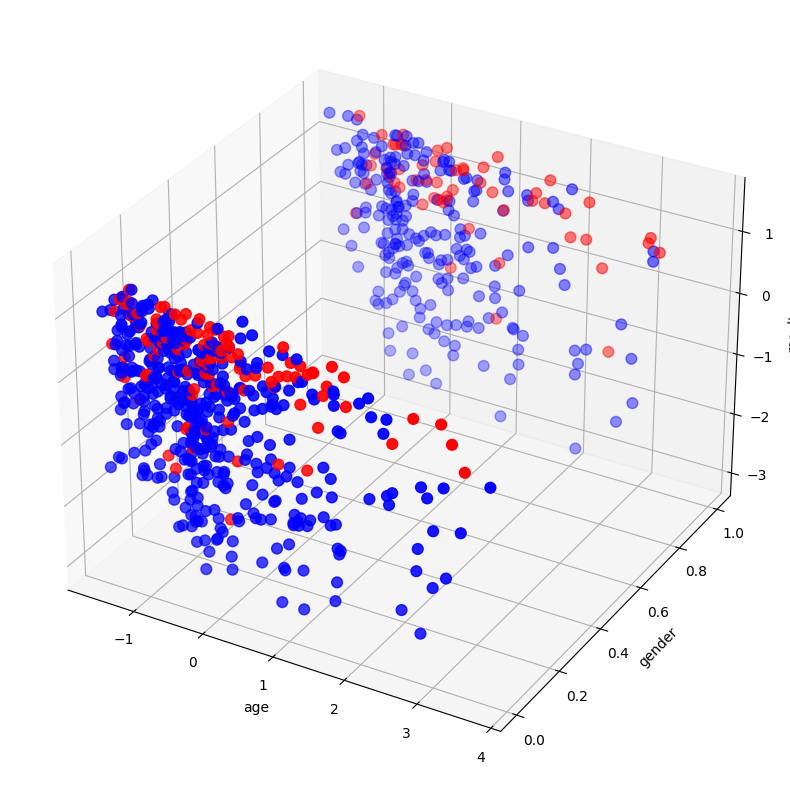

In [88]:
X = np.array(dfTratado[["age","gender","result"]])
y = np.array(dfTratado["Class/ASD"])

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection='3d')

colores=['blue','red']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

ax.set_xlabel('age')
ax.set_ylabel('gender')
ax.set_zlabel('result')

plt.show()


Para hallar el número de clústers que va a tener el algoritmo, es decir, el valor de k, reviso la gráfica del codo. Voy a reducir los atributos del dataset considerando sólo 3 (age, result y PuntuacionTest) ya que los resultados de A1 a A10 están representados en PuntuacionTest y las otras variables son categóricas y éstas no deberían considerarse en k-means (por ejemplo, gender vale 0 o 1 pero no es un valor que numéricamente tenga significado, no debe usarse para calcular distancias euclídeas, que es lo que hace k-means)

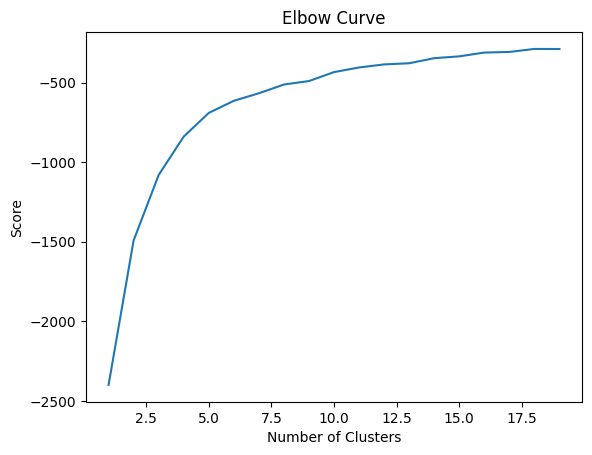

In [89]:
from sklearn.cluster import KMeans 
from sklearn.metrics import pairwise_distances_argmin_min

X = np.array(dfTratado[["age","result","PuntuacionTest"]])

Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i,n_init='auto') for i in Nc]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Mirando el codo considero que debería coger k=5 porque a partir de aquí se suaviza mucho la curva, volviéndose casi plana. Reviso los centroides

In [90]:
kmeans = KMeans(n_clusters=5, n_init='auto').fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 1.61677777 -1.29628094 -0.63472778]
 [ 1.46853969  0.63034883  1.08696373]
 [-0.21069341 -1.21943394 -0.62721702]
 [-0.57063868  0.27387403 -0.76641853]
 [-0.44421264  0.80575995  1.03492276]]


Ahora represento los centroides y los puntos, para ver cómo queda la agrupación

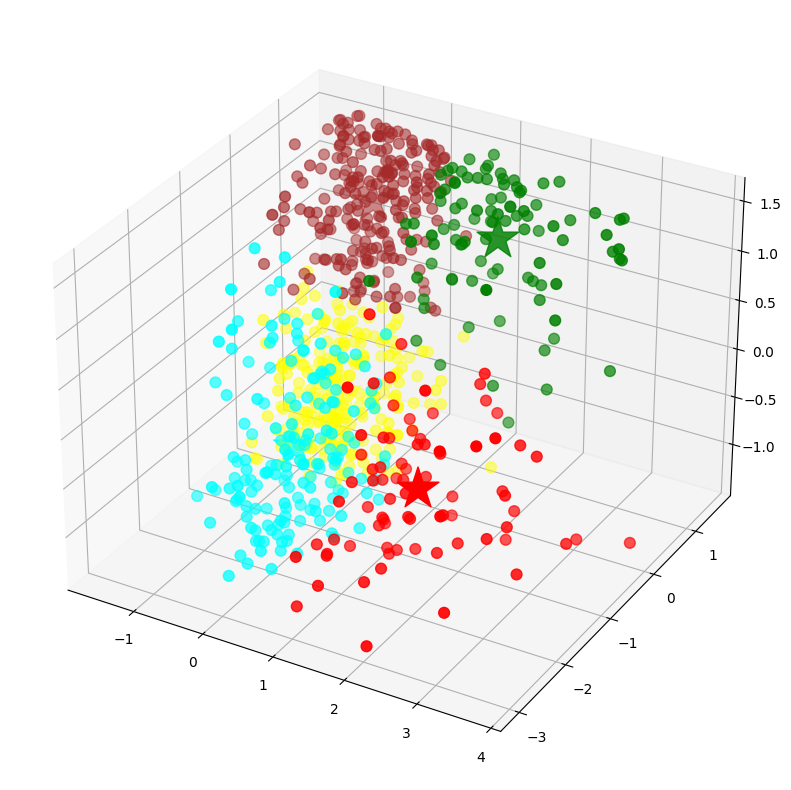

In [91]:
labels = kmeans.predict(X)
C = kmeans.cluster_centers_
colores=['red','green','cyan','yellow', 'brown']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

Finalmente puedo revisar cuántos elementos se agrupan en cada clúster

In [92]:
dfKMeans = dfTratado.copy()
dfKMeans['label'] = labels

cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=dfKMeans.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,79
1,green,96
2,cyan,166
3,yellow,236
4,brown,223


También puedo mirar cómo agruparía los datos en un conjunto que no ha formado parte de la generación del modelo, como serían los datos del dfTest

In [93]:
X = np.array(dfTest[["age","result","PuntuacionTest"]])
labels = kmeans.predict(X)

dfKMeans = dfTest.copy()
dfKMeans['label'] = labels

cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=dfKMeans.groupby('label').size()
cantidadGrupo


,color,cantidad
0,red,14
1,green,27
2,cyan,50
3,yellow,50
4,brown,59


Conclusión: En este caso en el que tenemos datos clasificados, con label, no sería adecuado utilizar k-means. Aunque considera 5 clústers, para nosotros la clasificación lógica serían 2 (tiene o no tiene autismo)

<font color=#FFFF00>5. CLASIFICACIÓN CON REGRESIÓN LOGÍSTICA. MÉTRICAS. PREDICCIONES.</font>

In [94]:
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score 


Vamos a dividir el dataframe en un 75% para train y un 25% para test, pero además lo vamos a hacer respetando la proporcion de filas que tienen el Class/ASD = 1 en cada conjunto

In [95]:
X_train, X_test = model_selection.train_test_split(dfTratado, stratify = dfTratado["Class/ASD"])

print("TRAIN", X_train.groupby("Class/ASD")["Class/ASD"].count())
print("TEST", X_test.groupby("Class/ASD")["Class/ASD"].count())


TRAIN Class/ASD
0    479
1    121
Name: Class/ASD, dtype: int64
TEST Class/ASD
0    160
1     40
Name: Class/ASD, dtype: int64


Ahora voy a ajustar el modelo de regresión logística con los datos de train

In [96]:
y_train = X_train['Class/ASD']
X_train = X_train.drop(["Class/ASD"], axis=1, inplace=False)

y_test = X_test['Class/ASD']
X_test = X_test.drop(["Class/ASD"], axis=1, inplace=False)

modelLR = linear_model.LogisticRegression(solver='lbfgs', max_iter=1000)
modelLR.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

Compruebo qué tal desempeño tien este algoritmo con los datos de train

In [97]:
modelLR.score(X_train,y_train)

0.88

Y a continuación lo compruebo con los datos de test

In [98]:
modelLR.score(X_test,y_test)

0.87

Además del accuracy muestro la matriz de confusión

In [99]:
predictions = modelLR.predict(X_test)
accuracy = accuracy_score(y_test,predictions)*100

print("Accuracy:", accuracy)

confusion_mat = confusion_matrix(y_test,predictions)
print("Matriz de confusión\n", confusion_mat)

Accuracy: 87.0
Matriz de confusión
 [[145  15]
 [ 11  29]]


Para mostrar la matriz de confusión de una manera más gráfica, con colores, creo una función basada en el heatmap

In [100]:
LABELS = ["NO Autismo","SI Autismo"]
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(5, 5))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", cmap=plt.cm.plasma)
    plt.title("Matriz de confusión")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))

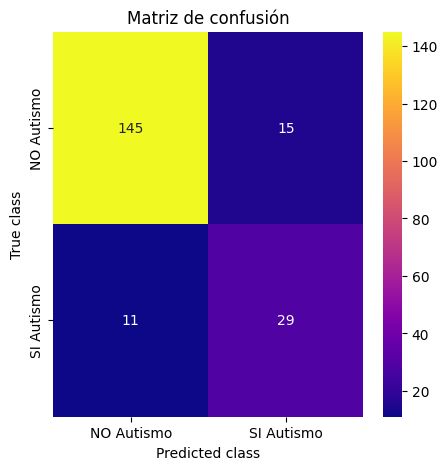

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       160
           1       0.66      0.72      0.69        40

    accuracy                           0.87       200
   macro avg       0.79      0.82      0.80       200
weighted avg       0.88      0.87      0.87       200



In [101]:
mostrar_resultados(y_test, predictions)

Parece que el modelo es bastante bueno, tiene una accuracy que supera el 85%

<font color=#FFFF00>6. CLASIFICACIÓN CON RANDOM FOREST. MÉTRICAS. PREDICCIONES.</font>

Creo un modelo con 100 árboles y lo entreno

In [102]:
from sklearn.ensemble import RandomForestClassifier

modelRF = RandomForestClassifier(n_estimators=100, bootstrap = True,verbose=2, max_features = 'sqrt')

modelRF.fit(X_train, y_train)

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


RandomForestClassifier(verbose=2)

hago las predicciones y calculo matriz de confusión

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


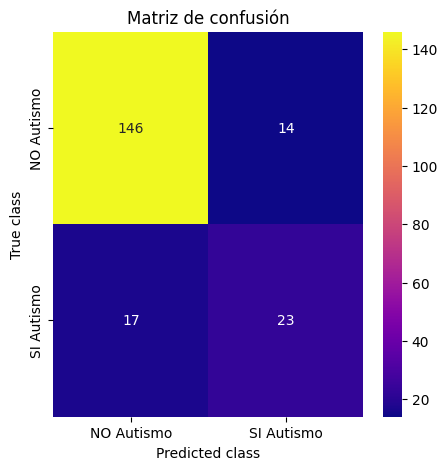

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       160
           1       0.62      0.57      0.60        40

    accuracy                           0.84       200
   macro avg       0.76      0.74      0.75       200
weighted avg       0.84      0.84      0.84       200



In [103]:
pred_y = modelRF.predict(X_test)
mostrar_resultados(y_test, pred_y)

Este modelo es igualmente bueno, tiene un accuracy muy similar a la Regresión Logística

<font color=#FFFF00>7. OTRAS COMPARATIVAS Y PREDICCIONES CON EL CSV DE TEST</font>

Aunque antes ya había revisado las accuracy de los dos algortimos, voy a comparar las métricas de ambos con CrossValidation, tanto para TRAIN como para TEST

In [104]:
kfold = model_selection.KFold(n_splits=10)

cv_results = model_selection.cross_val_score(modelLR, X_train, y_train, cv=kfold, scoring='accuracy')
str1 = "%s: %f (%f)" % ("Conjunto TRAIN: CrossValidation con modelo Logistic Regression", cv_results.mean(), cv_results.std())

cv_results = model_selection.cross_val_score(modelRF, X_train, y_train, cv=kfold, scoring='accuracy')
str2 = "%s: %f (%f)" % ("Conjunto TRAIN: CrossValidation con modelo Random Forest", cv_results.mean(), cv_results.std())

cv_results = model_selection.cross_val_score(modelLR, X_test, y_test, cv=kfold, scoring='accuracy')
str3="%s: %f (%f)" % ("Conjunto TEST: CrossValidation con modelo Logistic Regression", cv_results.mean(), cv_results.std())

cv_results = model_selection.cross_val_score(modelRF, X_test, y_test, cv=kfold, scoring='accuracy')
str4 = "%s: %f (%f)" % ("Conjunto TEST: CrossValidation con modelo Random Forest", cv_results.mean(), cv_results.std())

print(str1 + "\n", str2 + "\n", str3 + "\n", str4)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 1

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Igual que anteriormente, las métricas con CrossValidation son bastante similares utilizando el modelo de Logistic Regression y el de Random Forest.


Como último ejercicio y dado que con el conjunto de datos se proporcionaba un archivo test.csv del cual teníamos todos los atributos menos el atributo objetivo (Class/ASD), voy a pasar este conjunto de datos por los dos algoritmos, el de Regresión Lineal y el Random Forest, y voy a revisar, por curiosidad, en cuántos casos coinciden y en cuántos difieren en su predicción.

In [105]:
dfComparar = pd.DataFrame()
dfComparar["LR"] = modelLR.predict(dfTest)
dfComparar["RF"]  = modelRF.predict(dfTest)

print("Número de predicciones coincidentes: ", len(dfComparar[dfComparar['LR'] == dfComparar['RF']]))
print("Número de predicciones diferentes: ", len(dfComparar[dfComparar['LR'] != dfComparar['RF']]))


Número de predicciones coincidentes:  184
Número de predicciones diferentes:  16


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Vemos que las predicciones de los dos algoritmos coinciden en más del 90% de casos